In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [2]:
def plot_distr(i, title=False, savedname=False):
    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot([0, len(i)], [0.5,0.5], color='black', linewidth=0.7)
    ax.plot(i.sort_values().values)
    ax.set_xlim(0, len(i))
    if savedname:
        plt.savefig(savedname, bbox_inches='tight')
    if title:
        plt.title(title)
    plt.show()

In [2]:
df = pd.read_csv('./compiled.tsv', sep='\t', index_col=0)

In [14]:
df[df['DIS'] > 0.5].sort_values(by='LEN')

,C,A,T,H,S35,S60,S95,S100,S100s,LEN,RES,DIS,SFAM
DOMAIN,,,,,,,,,,,,,
3r4yA01,1,20,5,640,2,1,1,1,1,13,2.00,0.566181,1.20.5.640
2j03501,1,20,5,640,4,1,1,1,2,15,1000.00,0.967193,1.20.5.640
1vsaY01,1,20,5,640,4,1,1,1,1,15,1000.00,0.967193,1.20.5.640
3u5gE04,1,20,5,640,5,1,1,1,2,16,1000.00,0.585144,1.20.5.640
2eppA01,3,30,160,60,69,1,1,1,1,16,999.00,0.753581,3.30.160.60
3u5cE04,1,20,5,640,5,1,1,1,1,16,1000.00,0.585144,1.20.5.640
2v49501,1,20,5,640,4,1,1,1,3,16,1000.00,0.979237,1.20.5.640
3ewkA02,1,20,5,460,5,2,1,1,1,17,2.34,0.628759,1.20.5.460
3m9qA02,1,20,5,220,1,1,1,1,1,17,1.29,0.621706,1.20.5.220


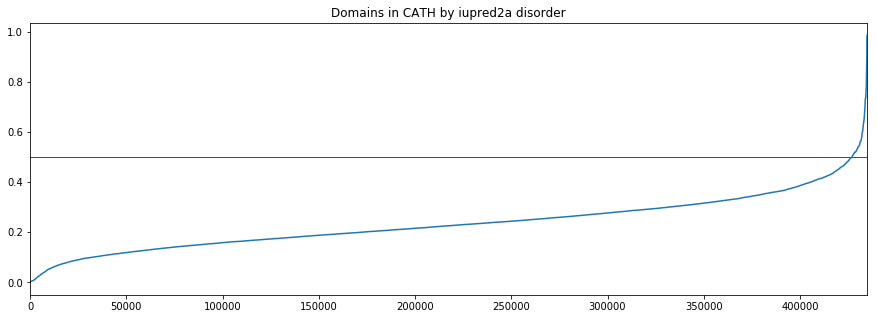

In [5]:
plot_distr(df.DIS, savedname='./figs/all_domains.png', title='Domains in CATH by iupred2a disorder')

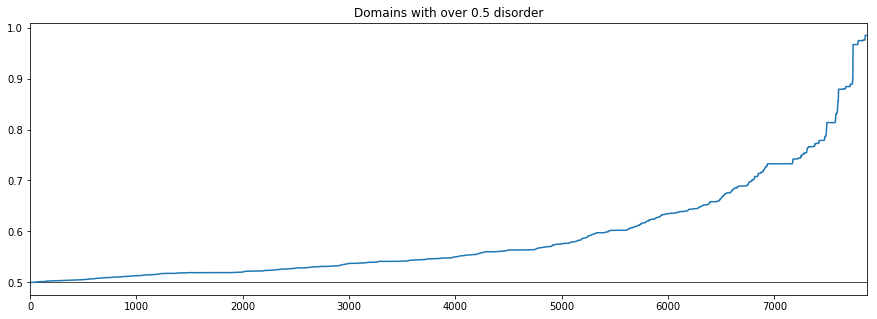

In [6]:
plot_distr(df[df['DIS']>0.5]['DIS'], savedname='./figs/over_50_domains.png', title='Domains with over 0.5 disorder')

In [7]:
over = df[df['DIS']>0.9]

In [8]:
over.SFAM.value_counts()

4.10.990.10    66
1.20.5.560     64
1.20.5.640      3
Name: SFAM, dtype: int64

In [9]:
gr = df.groupby('SFAM')

In [10]:
s = pd.Series()
for n, d in gr:
    s[n] = d.DIS.mean()

In [29]:
dom_len = pd.Series()
for n, d in gr:
    dom_len[n] = d.LEN.mean()

In [ ]:
stand_dev = pd.Series()
for n, d in gr:
    stand_dev[n] = d.DIS.std()

In [11]:
len(s[s>0.5])/len(s[s<0.5])*100

3.1697858708480866

In [47]:
perc = df[df['DIS']>0.9]['SFAM'].value_counts()/df['SFAM'].value_counts()*100
perc.dropna().sort_values(ascending=False)

4.10.990.10    100.000000
1.20.5.560     100.000000
1.20.5.640      33.333333
Name: SFAM, dtype: float64

In [44]:
df[df['SFAM'] == '1.20.5.190'].sort_values(by='DIS')

,C,A,T,H,S35,S60,S95,S100,S100s,LEN,RES,DIS,SFAM
DOMAIN,,,,,,,,,,,,,
2ix7C00,1,20,5,190,4,1,1,1,1,58,2.50,0.060771,1.20.5.190
2guvE00,1,20,5,190,1,1,3,1,5,56,1.40,0.077471,1.20.5.190
2guvC00,1,20,5,190,1,1,3,1,3,56,1.40,0.077471,1.20.5.190
2guvB00,1,20,5,190,1,1,3,1,2,56,1.40,0.077471,1.20.5.190
2guvA00,1,20,5,190,1,1,3,1,1,56,1.40,0.077471,1.20.5.190
2guvD00,1,20,5,190,1,1,3,1,4,56,1.40,0.077471,1.20.5.190
1n2dC00,1,20,5,190,2,1,1,1,1,48,2.00,0.095635,1.20.5.190
2gusA00,1,20,5,190,1,1,3,2,1,42,1.75,0.112130,1.20.5.190
3h6pA00,1,20,5,190,3,1,1,1,1,60,1.91,0.241553,1.20.5.190


In [28]:
stand_dev[stand_dev > 0.1].sort_values(ascending=False)

1.20.5.640       0.354811
1.20.5.190       0.312038
2.20.230.10      0.254564
2.30.30.70       0.233210
3.30.70.1070     0.233129
1.10.20.60       0.229785
1.20.120.660     0.229553
1.20.5.220       0.228787
3.30.1430.10     0.227737
1.10.150.430     0.217988
2.30.30.340      0.215967
1.20.5.420       0.212991
2.20.170.10      0.208374
2.40.50.920      0.206008
4.10.60.10       0.205403
1.10.287.770     0.204204
3.10.540.10      0.199766
3.30.390.90      0.196498
1.20.58.850      0.191940
1.20.5.320       0.186453
1.20.5.140       0.186128
1.10.10.790      0.182500
2.20.20.130      0.180748
2.40.128.50      0.179885
1.20.5.110       0.178535
2.60.120.1540    0.175519
1.10.287.660     0.175503
1.20.5.170       0.175087
2.60.40.3080     0.173945
1.20.5.440       0.173032
                   ...   
3.30.50.10       0.102743
2.10.70.70       0.102566
3.30.70.1490     0.102476
3.10.20.310      0.102420
1.10.3340.10     0.102346
1.10.10.810      0.102156
2.30.260.10      0.102120
2.80.10.50  

In [36]:
print(stand_dev.corr(size))
print(stand_dev.corr(dom_len))

0.13204435262667005
-0.07326321756000401


In [33]:
size = df.SFAM.value_counts()

In [38]:
dom_len

1.10.10.10       88.756962
1.10.10.1000     96.000000
1.10.10.1010    144.000000
1.10.10.1020    109.500000
1.10.10.1030     41.000000
1.10.10.1040     98.500000
1.10.10.1050     86.857143
1.10.10.1060     57.000000
1.10.10.1070     57.166667
1.10.10.1080     86.500000
1.10.10.1090     86.000000
1.10.10.1100     65.600000
1.10.10.1110     72.000000
1.10.10.1120     62.000000
1.10.10.1130     79.000000
1.10.10.1140    122.380952
1.10.10.1150     90.000000
1.10.10.1160     88.000000
1.10.10.1170     77.500000
1.10.10.1180     98.000000
1.10.10.1190     61.500000
1.10.10.1200     92.500000
1.10.10.1210    111.000000
1.10.10.1220     88.000000
1.10.10.1230    112.555556
1.10.10.1240     68.500000
1.10.10.1250     78.833333
1.10.10.1260     53.500000
1.10.10.1270     63.687500
1.10.10.1280     75.533333
                   ...    
4.10.8.20        59.000000
4.10.80.10       50.602941
4.10.80.20       30.000000
4.10.80.30       40.225806
4.10.80.40       52.148148
4.10.800.10      71.400000
4